# Data Preprocessing and modeling:


In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import recall_score, make_scorer
from sklearn.model_selection import RandomizedSearchCV

In [135]:
DM_f=pd.read_csv("C:/Users/Dell/Desktop/Aya Allam DEPI Project/Clead_data.csv",index_col=0)

In [136]:
DM_f.head()

,Identifier,Gender,Religion,Avg_HBA1C Results,HBA1C test Compliance,Chronic_flag,Acute_flag,# OP_Bef_chr,Comorbidity,Atrial Fibrilation,...,Hypertension,Ischemic Heart Disease,Myocardial Infarction,Obesity,Stroke,Nationality_cleaned,Cultural_Tradition,Age,ERV_before,IP_before
0,1,Male,Other,5.438750,0,0,0,0,0.0,0,...,0,0,0,0,0,Palestine,Levant,51,0,0
1,2,Male,Other,6.186032,1,0,0,0,0.0,0,...,0,0,0,0,0,Saudi Arabia,Gulf/Arabian,49,0,0
2,3,Female,Other,6.099180,1,0,0,0,0.0,0,...,1,0,0,0,0,Saudi Arabia,Gulf/Arabian,70,0,0
3,4,Male,Other,8.804544,0,0,0,0,0.0,0,...,1,0,0,0,0,Saudi Arabia,Gulf/Arabian,51,0,0
4,5,Male,Other,8.232722,1,0,0,0,0.0,0,...,0,0,0,0,0,Saudi Arabia,Gulf/Arabian,71,0,0


In [137]:
DM_f.isnull().sum()

Identifier                      0
Gender                          0
Religion                        0
Avg_HBA1C Results            3411
HBA1C test Compliance           0
Chronic_flag                    0
Acute_flag                      0
# OP_Bef_chr                    0
Comorbidity                    98
Atrial Fibrilation              0
Cancer                          0
Perepheral Artery Disease       0
Renal Insufficiency             0
Heart Failure                   0
Hypertension                    0
Ischemic Heart Disease          0
Myocardial Infarction           0
Obesity                         0
Stroke                          0
Nationality_cleaned             0
Cultural_Tradition              0
Age                             0
ERV_before                      0
IP_before                       0
dtype: int64

In [138]:
DM_f['Nationality_cleaned'].value_counts()

Nationality_cleaned
Saudi Arabia    8963
Egypt           1175
Yemen            411
Pakistan         287
India            234
                ... 
Bahamas            1
Samoa              1
North Korea        1
Andorra            1
Belgium            1
Name: count, Length: 83, dtype: int64

In [139]:
# Remove the nationality cleaned model from data:
DM_f.drop(['Nationality_cleaned'],axis=1,inplace=True)

In [140]:
DM_f.columns

Index(['Identifier ', 'Gender', 'Religion', 'Avg_HBA1C Results',
       'HBA1C test Compliance', 'Chronic_flag', 'Acute_flag', '# OP_Bef_chr',
       'Comorbidity', 'Atrial Fibrilation', 'Cancer',
       'Perepheral Artery Disease', 'Renal Insufficiency', 'Heart Failure',
       'Hypertension', 'Ischemic Heart Disease', 'Myocardial Infarction',
       'Obesity', 'Stroke', 'Cultural_Tradition', 'Age', 'ERV_before',
       'IP_before'],
      dtype='object')

In [141]:
DM_f.drop(['Identifier '],axis=1,inplace=True)

In [142]:
DM_f.shape

(12611, 22)

Splitting data:

categorical_=[Gender,Religion,IP_before,ERV_before,Cultural_Tradition,# OP_Bef_chr]

In [143]:
for col in DM_f.columns:
    print(DM_f[col].value_counts())

Gender
Male      6802
Female    5809
Name: count, dtype: int64
Religion
Islam           9275
Other           2271
Judaism          669
Unknown          350
Christianity      40
Hinduism           3
No Religion        2
Buddhism           1
Name: count, dtype: int64
Avg_HBA1C Results
5.200000    157
5.300000    148
5.400000    143
5.500000    136
5.100000    131
           ... 
6.849087      1
5.495905      1
5.719169      1
7.938566      1
7.562045      1
Name: count, Length: 4867, dtype: int64
HBA1C test Compliance
0    9554
1    3057
Name: count, dtype: int64
Chronic_flag
0    9023
1    3588
Name: count, dtype: int64
Acute_flag
0    12065
1      546
Name: count, dtype: int64
# OP_Bef_chr
0     10763
1       732
2       366
3       241
4       162
5       108
6        70
7        56
8        40
10       24
9        18
11        7
13        6
12        6
15        3
17        2
14        2
19        2
21        1
16        1
18        1
Name: count, dtype: int64
Comorbidity
0.0    1162

Data Splitting:

In [144]:
DM_f.columns

Index(['Gender', 'Religion', 'Avg_HBA1C Results', 'HBA1C test Compliance',
       'Chronic_flag', 'Acute_flag', '# OP_Bef_chr', 'Comorbidity',
       'Atrial Fibrilation', 'Cancer', 'Perepheral Artery Disease',
       'Renal Insufficiency', 'Heart Failure', 'Hypertension',
       'Ischemic Heart Disease', 'Myocardial Infarction', 'Obesity', 'Stroke',
       'Cultural_Tradition', 'Age', 'ERV_before', 'IP_before'],
      dtype='object')

In [145]:
DM_f["Religion"].value_counts()

Religion
Islam           9275
Other           2271
Judaism          669
Unknown          350
Christianity      40
Hinduism           3
No Religion        2
Buddhism           1
Name: count, dtype: int64

In [146]:
# splitting the data into train and valid but we saw that some feature having categories with one, two, three incidence only
# we should include this minority categories in the training data such as Religion with BUDDHIST

minor_data = DM_f[DM_f["Religion"].isin(["Hinduism", "No Religion", "Buddhism"])]  
major_data = DM_f[~DM_f["Religion"].isin(["Hinduism", "No Religion", "Buddhism"])]

X_train = minor_data.drop(["Chronic_flag"], axis=1)
y_train = minor_data["Chronic_flag"]
X_rest = major_data.drop(["Chronic_flag"], axis=1)
y_rest = major_data["Chronic_flag"]

# split the rest data
X_train_rest, X_test, y_train_rest, y_test = train_test_split(X_rest, y_rest, test_size=0.25, random_state=42)

# add the minor to the train data
X_train = pd.concat([X_train, X_train_rest], axis=0)
y_train = pd.concat([y_train, y_train_rest], axis=0)

In [107]:
#X = DM_f.drop('Chronic_flag', axis=1)
#y = DM_f['Chronic_flag']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [147]:
X_train.shape, X_test.shape

((9459, 21), (3152, 21))

In [148]:
y_train.value_counts()

Chronic_flag
0    6723
1    2736
Name: count, dtype: int64

In [149]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

In [150]:
DM_f['Comorbidity'].value_counts()

Comorbidity
0.0    11628
1.0      885
Name: count, dtype: int64

# Modeling:

In [112]:
DM_f.columns

Index(['Gender', 'Religion', 'Avg_HBA1C Results', 'HBA1C test Compliance',
       'Chronic_flag', 'Acute_flag', '# OP_Bef_chr', 'Comorbidity',
       'Atrial Fibrilation', 'Cancer', 'Perepheral Artery Disease',
       'Renal Insufficiency', 'Heart Failure', 'Hypertension',
       'Ischemic Heart Disease', 'Myocardial Infarction', 'Obesity', 'Stroke',
       'Cultural_Tradition', 'Age', 'ERV_before', 'IP_before'],
      dtype='object')

In [157]:
pip install fancyimpute

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     - -------------------------------------- 0.0/1.1 MB ? eta -:--:--
     - -------------------------------------- 0.0/1.1 MB ? eta -:--:--
     - -------------------------------------- 0.0/1.1 MB 326.8 kB/s eta 0:00:04
     ---- ----------------------------------- 0.1/1.1 MB 726.2 kB/s eta 0:00:02
     ----- ---------------------------------- 0.2/1.1 MB 766.6 kB/s eta 0:00:02
     ------- -------------------------------- 0.2/1.1 MB 888.4 kB/s eta 0:00:02
     --------- ------------------------------ 0.3/1.1 MB 1.0 MB/s eta 0:00:01
     ----------- ---------------------------- 0.3/1.1 MB 984.6 kB/s eta 0:00:01
     -------------- ------------------------- 0.4/1.1 MB 1.1 MB/s eta 0:00:01
     -------------------- -

  DEPRECATION: knnimpute is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  DEPRECATION: fancyimpute is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [225]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, mutual_info_classif


# Define the list of categorical and numerical columns
categorical_columns = ['Gender','Religion','Cultural_Tradition','Comorbidity']
numerical_columns = ['Age', 'Avg_HBA1C Results','IP_before', 'ERV_before','# OP_Bef_chr']  # Adjusted to include HBA1C

# Preprocessing for numerical columns (fill missing values and scale)
numerical_pipeline = Pipeline([
    ('imputer', KNNImputer()),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Scale the numerical values
])

# Preprocessing for categorical columns (fill missing values and encode)
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Corrected: removed extra parenthesis
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-hot encode categorical features
])

# Combine both transformations into a column transformer
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_columns),
    ('cat', categorical_pipeline, categorical_columns)
])

# Fit the preprocessor to the training data
preprocessor.fit(X_train)  # Assuming X_train is your training data

# Get column names for numerical columns (no changes in the name)
numerical_column_names = numerical_columns

# Get column names for categorical columns after one-hot encoding
categorical_column_names = preprocessor.transformers_[1][1].named_steps['encoder'].get_feature_names_out(categorical_columns)

# Combine both numerical and categorical column names
all_column_names = np.concatenate([numerical_column_names, categorical_column_names])

# Transform both X_train and X_test using the fitted preprocessor
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)
# Step 2: Apply feature selection to keep top 5 features
#selector = SelectKBest(score_func=mutual_info_classif, k=10)
#X_train_selected = selector.fit_transform(X_train_transformed, y_train)
#X_test_selected = selector.transform(X_test_transformed)

# Step 3: Get the names of the selected features
#selected_feature_mask = selector.get_support()  # Boolean mask of selected features
#selected_feature_names = all_column_names[selected_feature_mask]

#print("\nTop 5 Selected Features:")
#print(selected_feature_names)

# Step 4: Convert to DataFrames if needed
X_train_selected_df = pd.DataFrame(X_train_transformed, columns=all_column_names)
X_test_selected_df = pd.DataFrame(X_test_transformed, columns=all_column_names)


# Print the first few rows of the transformed data
print("\nTransformed X_train:")
print(X_train_selected_df .head())

print("\nTransformed X_test:")
print(X_test_selected_df.head())

# Print the transformed column names
transformed_columns_df = pd.DataFrame(all_column_names, columns=["Transformed Column Names"])
print("\nTransformed Column Names after Preprocessing:")
print(transformed_columns_df)



Transformed X_train:
        Age  Avg_HBA1C Results  IP_before  ERV_before  # OP_Bef_chr  \
0 -0.023584           0.460019  -0.094278   -0.095883     -0.301887   
1  0.239408           0.043510  -0.094278   -0.095883      0.393740   
2  1.948860          -0.278886  -0.094278   -0.095883     -0.301887   
3  0.042164          -0.953660  -0.094278   -0.095883     -0.301887   
4 -0.023584          -1.081780  -0.094278   -0.095883     -0.301887   

   Gender_Female  Gender_Male  Religion_Buddhism  Religion_Christianity  \
0            0.0          1.0                0.0                    0.0   
1            0.0          1.0                0.0                    0.0   
2            1.0          0.0                1.0                    0.0   
3            1.0          0.0                0.0                    0.0   
4            0.0          1.0                0.0                    0.0   

   Religion_Hinduism  ...  Cultural_Tradition_Latin America  \
0                1.0  ...            

Check target:


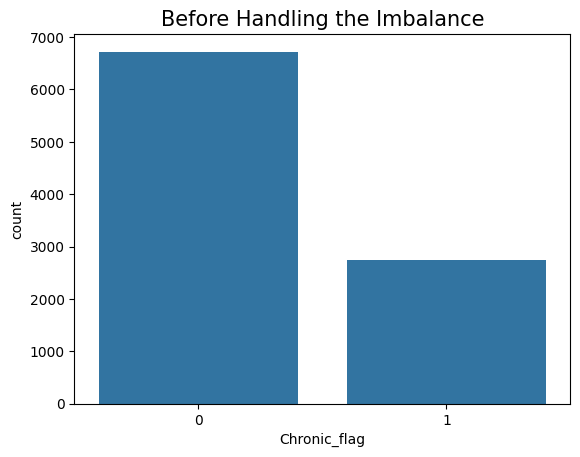

In [159]:
sns.countplot(x = y_train)
plt.title('Before Handling the Imbalance', color = 'black', fontsize = 15)
plt.show()

# So make balance using:SMOTE

In [160]:
# Apply SMOTE to balance the training data
sampler = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sampler.fit_resample(X_train_transformed, y_train)

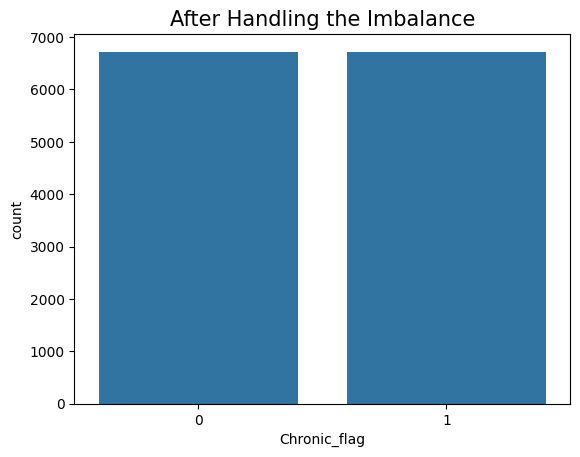

In [161]:
sns.countplot(x = y_train_balanced)
plt.title('After Handling the Imbalance', color = 'black', fontsize = 15)
plt.show()

Modeling

In [117]:
!pip install lightgbm


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [118]:
!pip install xgboost


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [119]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import PrecisionRecallDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt


RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.91      0.89      2300
         Yes       0.72      0.60      0.65       852

    accuracy                           0.83      3152
   macro avg       0.79      0.75      0.77      3152
weighted avg       0.82      0.83      0.82      3152

Accuracy: 0.83
F1 Score: 0.65
ROC AUC: 0.81
PR AUC: 0.76
Matthews Corrcoef: 0.54


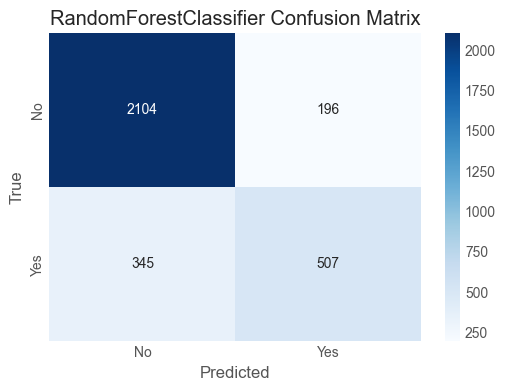

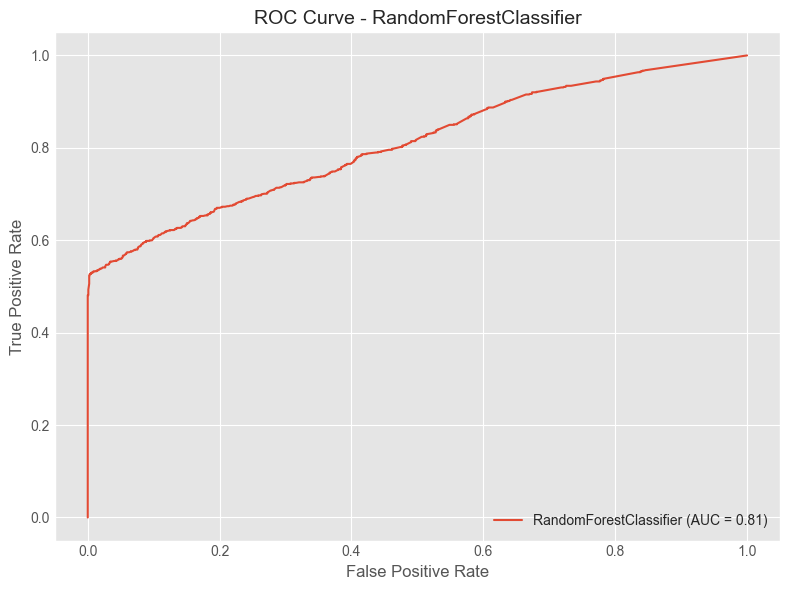

LogisticRegression Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.95      0.90      2300
         Yes       0.82      0.57      0.67       852

    accuracy                           0.85      3152
   macro avg       0.84      0.76      0.79      3152
weighted avg       0.85      0.85      0.84      3152

Accuracy: 0.85
F1 Score: 0.67
ROC AUC: 0.83
PR AUC: 0.78
Matthews Corrcoef: 0.59


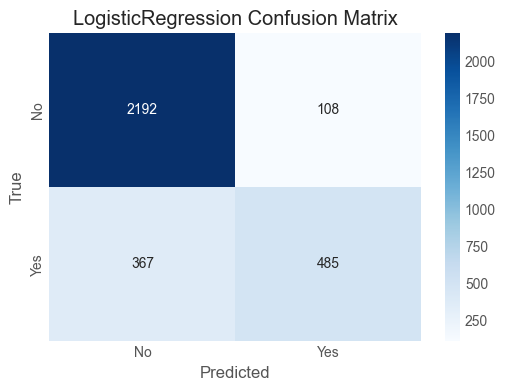

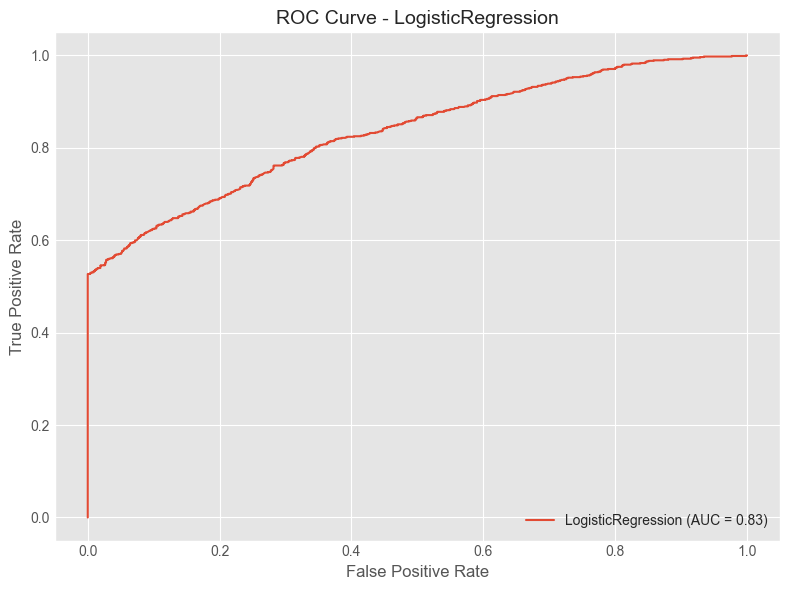

KNeighborsClassifier Classification Report:
              precision    recall  f1-score   support

          No       0.85      0.96      0.90      2300
         Yes       0.83      0.54      0.65       852

    accuracy                           0.85      3152
   macro avg       0.84      0.75      0.78      3152
weighted avg       0.84      0.85      0.83      3152

Accuracy: 0.85
F1 Score: 0.65
ROC AUC: 0.79
PR AUC: 0.70
Matthews Corrcoef: 0.58


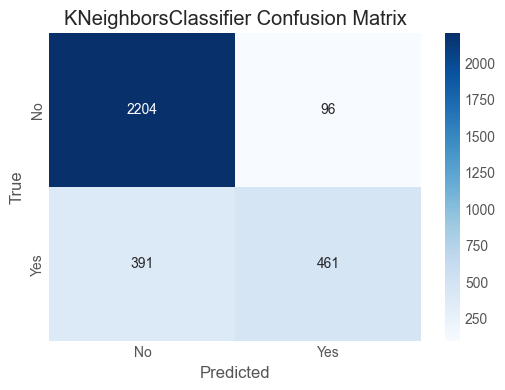

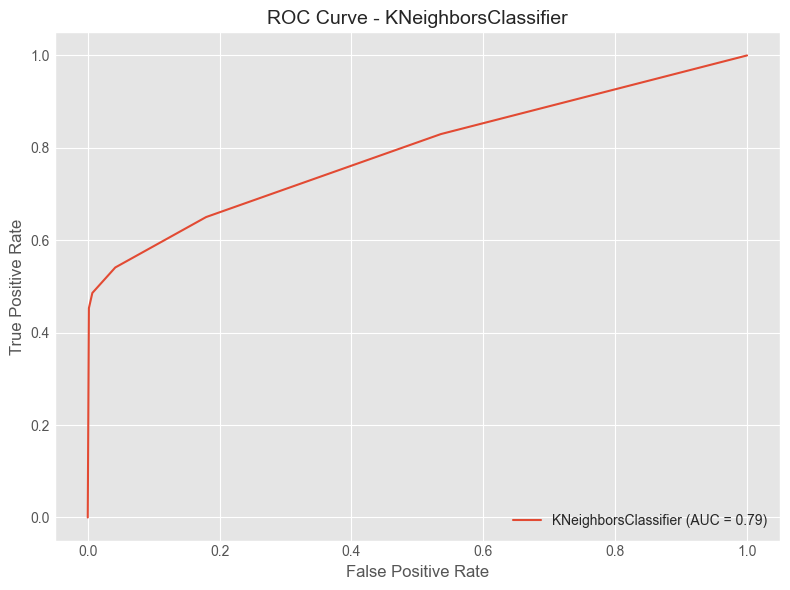

[LightGBM] [Info] Number of positive: 2736, number of negative: 6723
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 9459, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289248 -> initscore=-0.899037
[LightGBM] [Info] Start training from score -0.899037
LGBMClassifier Classification Report:
              precision    recall  f1-score   support

          No       0.85      0.99      0.92      2300
         Yes       0.95      0.54      0.69       852

    accuracy                           0.87      3152
   macro avg       0.90      0.76      0.80      3152
weighted avg       0.88      0.87      0.85      3152

Accuracy: 0.87
F1 Score: 0.69
ROC AUC: 0.82
PR AUC: 0.77
Matthews Corrcoef: 0.65


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


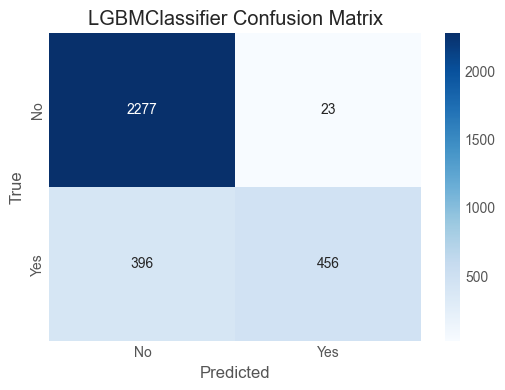

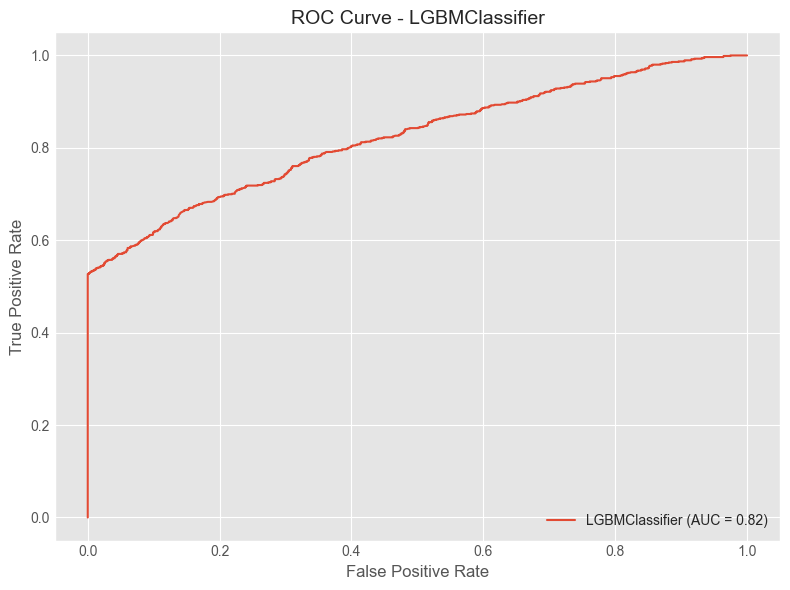

SVC Classification Report:
              precision    recall  f1-score   support

          No       0.85      1.00      0.92      2300
         Yes       1.00      0.53      0.69       852

    accuracy                           0.87      3152
   macro avg       0.92      0.76      0.80      3152
weighted avg       0.89      0.87      0.86      3152

Accuracy: 0.87
F1 Score: 0.69
ROC AUC: 0.78
PR AUC: 0.74
Matthews Corrcoef: 0.67


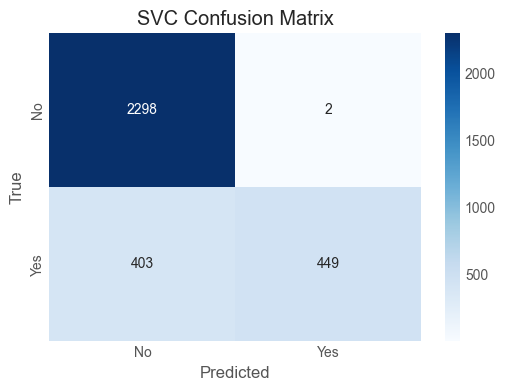

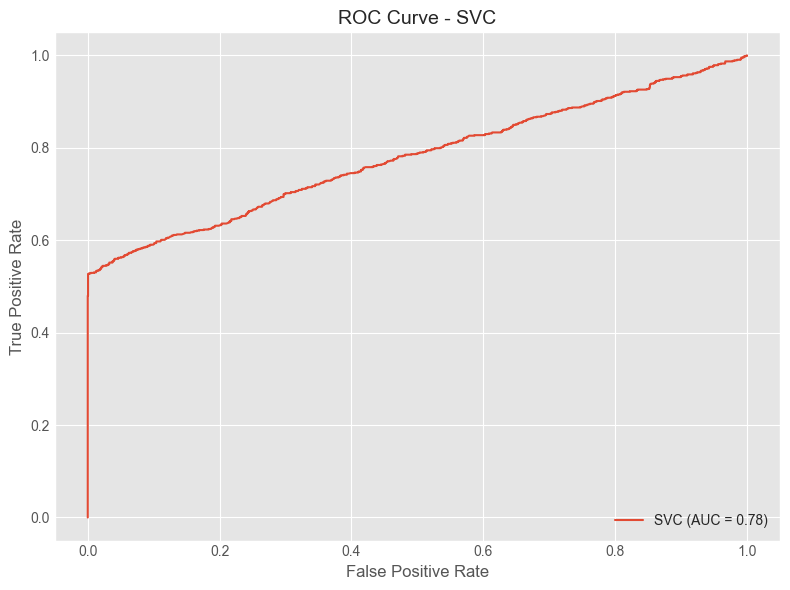

XGBClassifier Classification Report:
              precision    recall  f1-score   support

          No       0.85      0.98      0.91      2300
         Yes       0.92      0.54      0.68       852

    accuracy                           0.86      3152
   macro avg       0.89      0.76      0.80      3152
weighted avg       0.87      0.86      0.85      3152

Accuracy: 0.86
F1 Score: 0.68
ROC AUC: 0.81
PR AUC: 0.76
Matthews Corrcoef: 0.63


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\training.py:183: UserWarning: [13:26:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


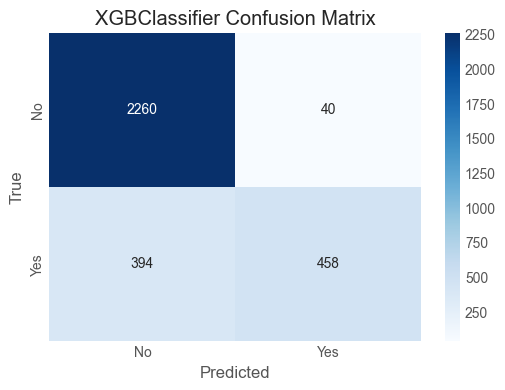

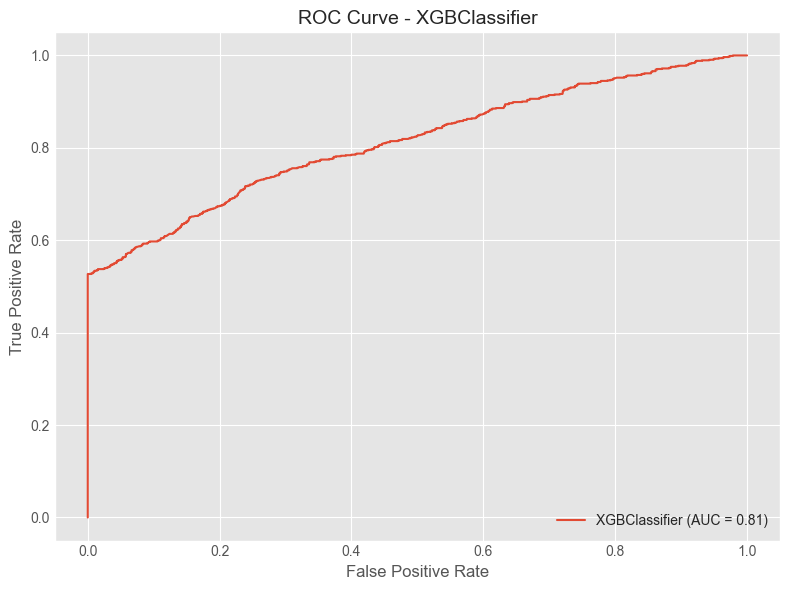

AdaBoostClassifier Classification Report:
              precision    recall  f1-score   support

          No       0.84      1.00      0.92      2300
         Yes       1.00      0.50      0.67       852

    accuracy                           0.87      3152
   macro avg       0.92      0.75      0.79      3152
weighted avg       0.89      0.87      0.85      3152

Accuracy: 0.87
F1 Score: 0.67
ROC AUC: 0.81
PR AUC: 0.71
Matthews Corrcoef: 0.65


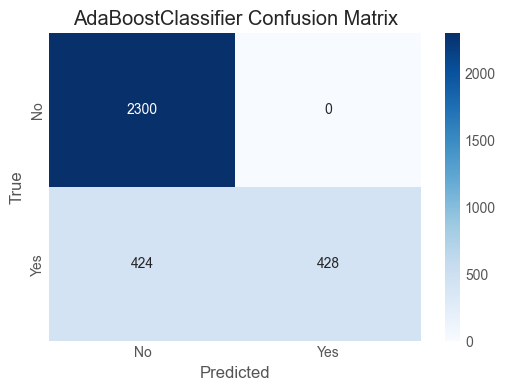

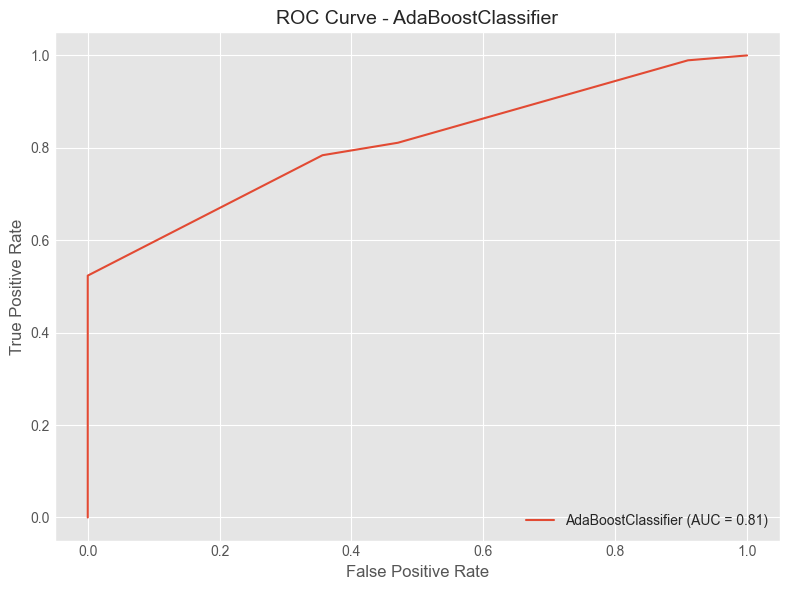

GradientBoostingClassifier Classification Report:
              precision    recall  f1-score   support

          No       0.85      1.00      0.92      2300
         Yes       0.98      0.53      0.69       852

    accuracy                           0.87      3152
   macro avg       0.92      0.76      0.80      3152
weighted avg       0.89      0.87      0.86      3152

Accuracy: 0.87
F1 Score: 0.69
ROC AUC: 0.84
PR AUC: 0.78
Matthews Corrcoef: 0.66


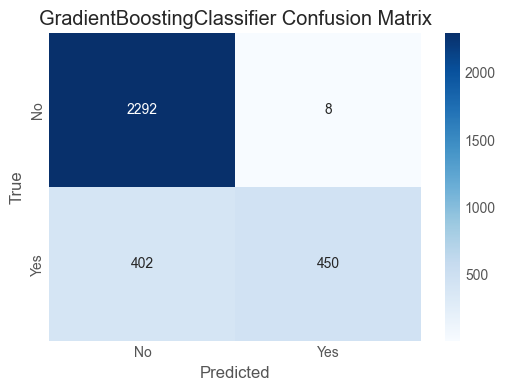

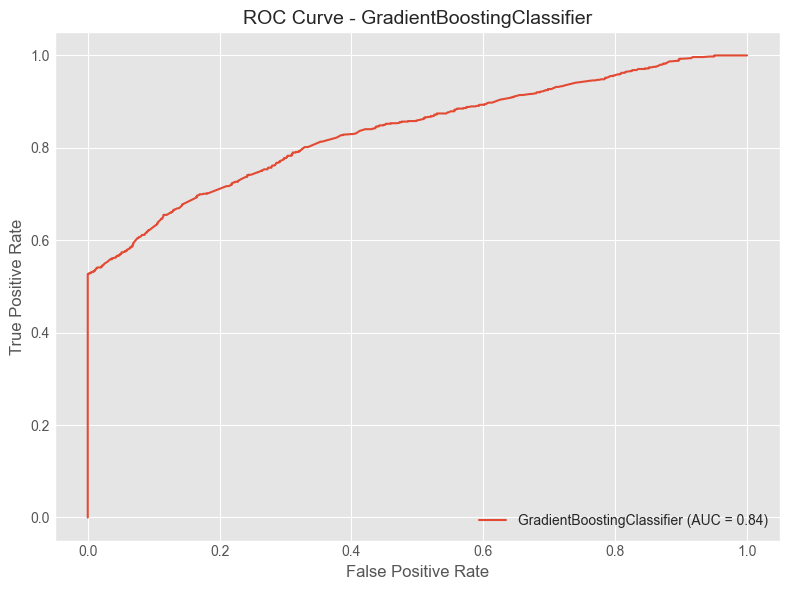

BaggingClassifier Classification Report:
              precision    recall  f1-score   support

          No       0.85      0.93      0.89      2300
         Yes       0.76      0.57      0.65       852

    accuracy                           0.84      3152
   macro avg       0.81      0.75      0.77      3152
weighted avg       0.83      0.84      0.83      3152

Accuracy: 0.84
F1 Score: 0.65
ROC AUC: 0.80
PR AUC: 0.74
Matthews Corrcoef: 0.56


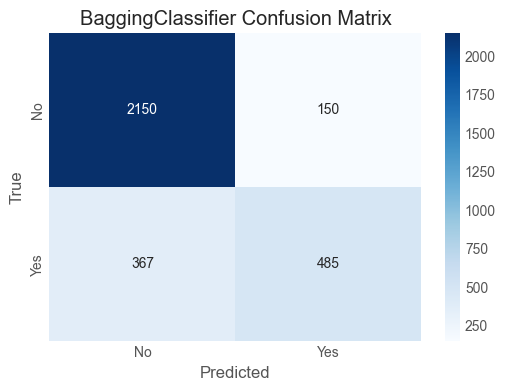

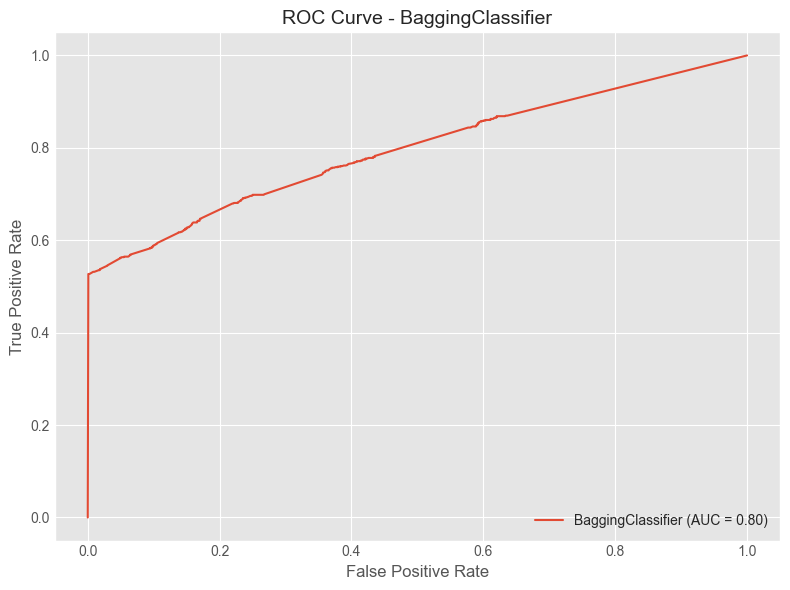

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
import lightgbm as lgb
import xgboost as xgb

from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, average_precision_score,
    classification_report, confusion_matrix, matthews_corrcoef, roc_curve
)

# Define labels
labels = ['No', 'Yes']

# Initialize classifiers
clf2 = RandomForestClassifier(random_state=42, class_weight='balanced')
clf3 = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
clf4 = KNeighborsClassifier()
clf5 = lgb.LGBMClassifier(random_state=42)
clf6 = SVC(probability=True, random_state=42)
clf7 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
clf8 = AdaBoostClassifier(random_state=42)
clf9 = GradientBoostingClassifier(random_state=42)
clf10 = BaggingClassifier(random_state=42)
#clf11 = DummyClassifier(strategy="stratified", random_state=42)

# List of models
models = [clf2, clf3, clf4, clf5, clf6, clf7, clf8, clf9, clf10]

# Plot settings
plt.style.use('ggplot')  # A consistent, safe style

# Loop through models
for clf in models:
    model_name = clf.__class__.__name__

    # Fit the model
    clf.fit(X_train_transformed, y_train)

    # Predict probabilities for AUC
    if hasattr(clf, "predict_proba"):
        y_prob = clf.predict_proba(X_test_transformed)[:, 1]
    else:
        y_prob = clf.decision_function(X_test_transformed)

    # Predict labels
    y_pred = clf.predict(X_test_transformed)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Classification Report
    cr = classification_report(y_test, y_pred, target_names=labels)
    print(f"{model_name} Classification Report:")
    print(cr)

    # Evaluate metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)
    matcf = matthews_corrcoef(y_test, y_pred)

    # Print metrics
    print(f"Accuracy: {acc:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")
    print(f"PR AUC: {pr_auc:.2f}")
    print(f"Matthews Corrcoef: {matcf:.2f}")

    # Confusion Matrix Plot
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
    plt.title(f"ROC Curve - {model_name}", fontsize=14)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()




#Run after SMOTE Balancing:

RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.87      0.87      2300
         Yes       0.64      0.62      0.63       852

    accuracy                           0.80      3152
   macro avg       0.75      0.74      0.75      3152
weighted avg       0.80      0.80      0.80      3152

Accuracy: 0.80
F1 Score: 0.63
ROC AUC: 0.81
PR AUC: 0.75
Matthews Corrcoef: 0.49


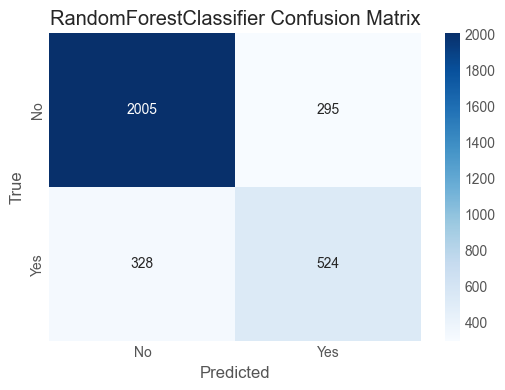

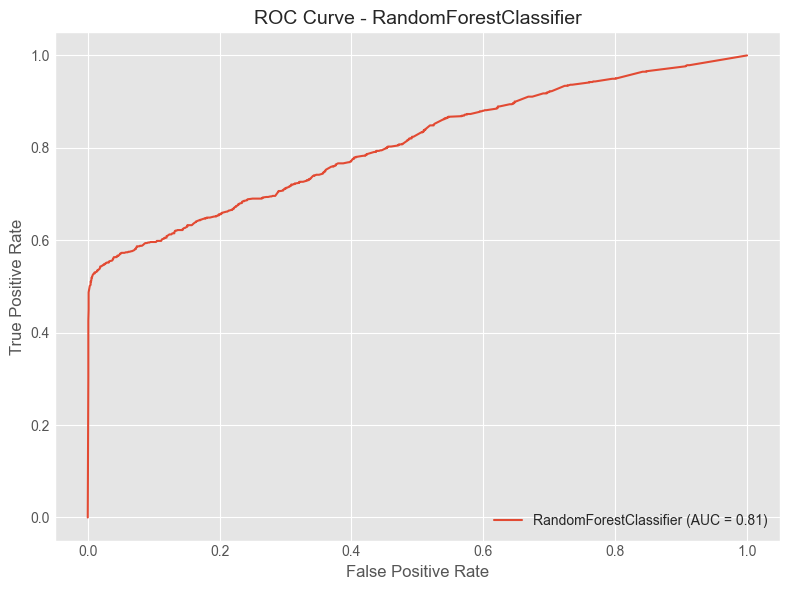

LogisticRegression Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.95      0.90      2300
         Yes       0.82      0.57      0.67       852

    accuracy                           0.85      3152
   macro avg       0.84      0.76      0.79      3152
weighted avg       0.85      0.85      0.84      3152

Accuracy: 0.85
F1 Score: 0.67
ROC AUC: 0.83
PR AUC: 0.78
Matthews Corrcoef: 0.59


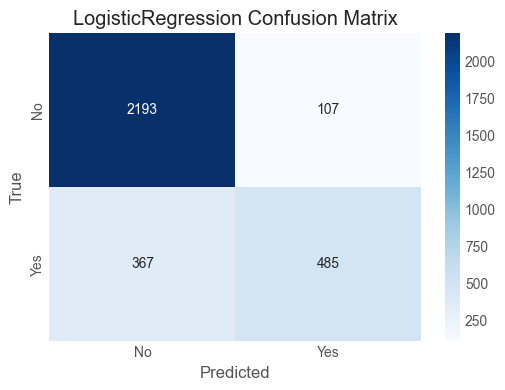

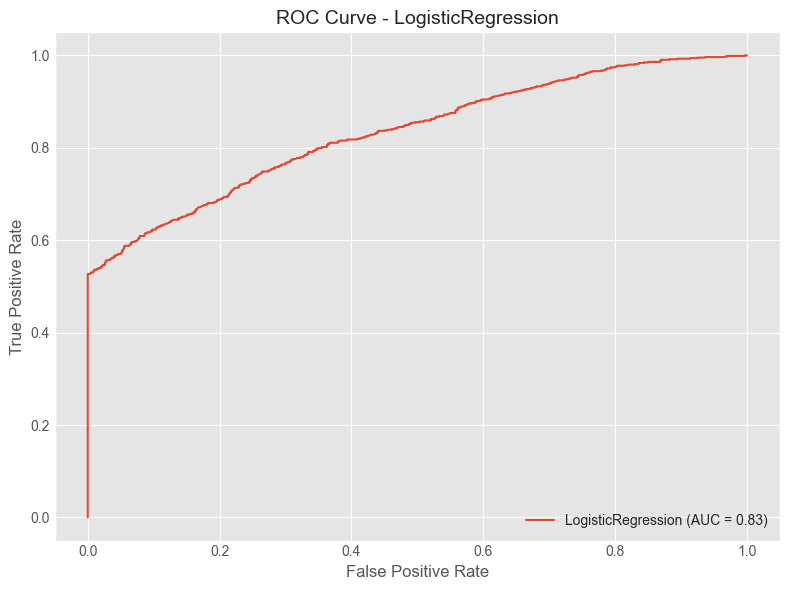

KNeighborsClassifier Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.82      0.84      2300
         Yes       0.56      0.63      0.59       852

    accuracy                           0.77      3152
   macro avg       0.71      0.72      0.71      3152
weighted avg       0.78      0.77      0.77      3152

Accuracy: 0.77
F1 Score: 0.59
ROC AUC: 0.78
PR AUC: 0.66
Matthews Corrcoef: 0.43


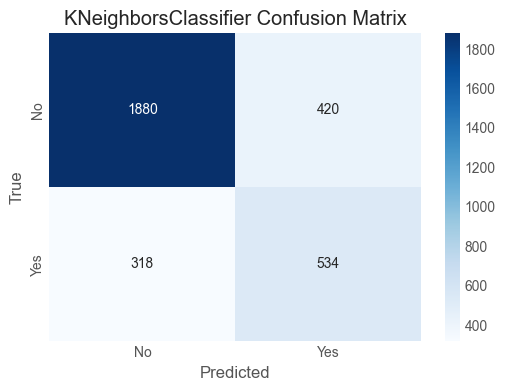

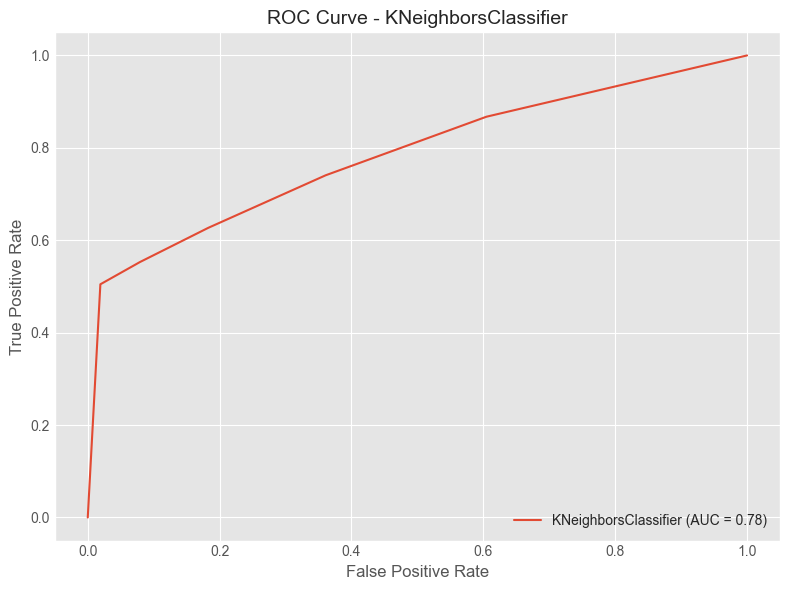

[LightGBM] [Info] Number of positive: 6723, number of negative: 6723
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000850 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1244
[LightGBM] [Info] Number of data points in the train set: 13446, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LGBMClassifier Classification Report:
              precision    recall  f1-score   support

          No       0.85      0.97      0.91      2300
         Yes       0.87      0.55      0.67       852

    accuracy                           0.86      3152
   macro avg       0.86      0.76      0.79      3152
weighted avg       0.86      0.86      0.84      3152

Accuracy: 0.86
F1 Score: 0.67
ROC AUC: 0.82
PR AUC: 0.77
Matthews Corrcoef: 0.61


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


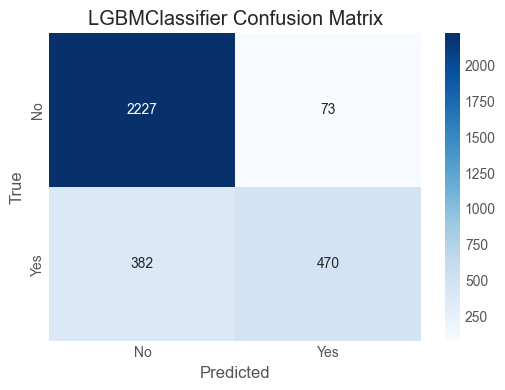

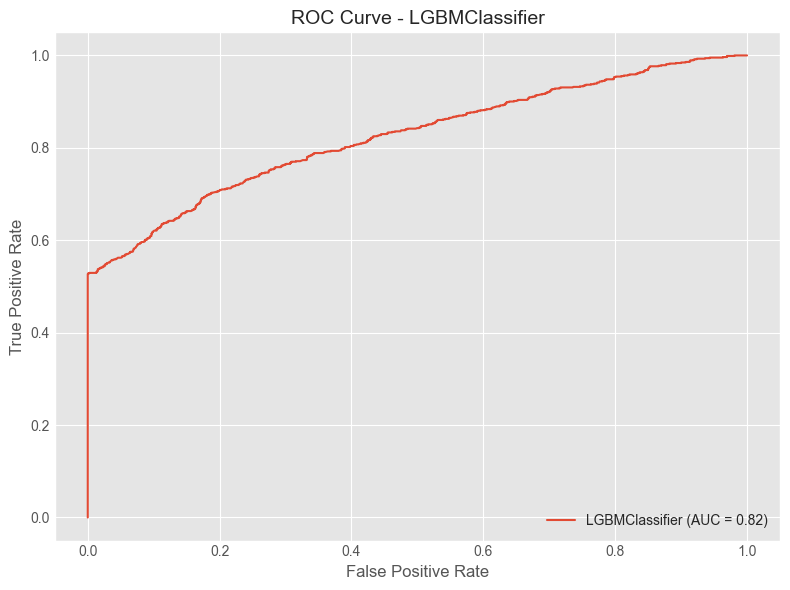

SVC Classification Report:
              precision    recall  f1-score   support

          No       0.85      0.99      0.92      2300
         Yes       0.94      0.54      0.68       852

    accuracy                           0.87      3152
   macro avg       0.90      0.76      0.80      3152
weighted avg       0.88      0.87      0.85      3152

Accuracy: 0.87
F1 Score: 0.68
ROC AUC: 0.80
PR AUC: 0.76
Matthews Corrcoef: 0.65


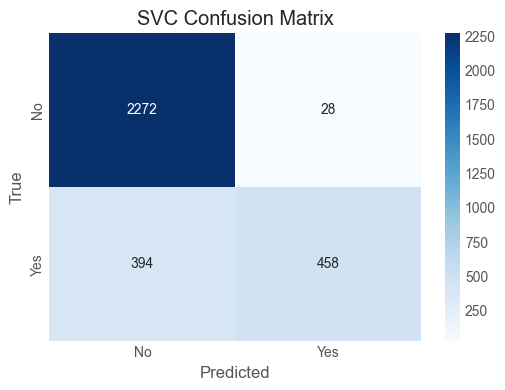

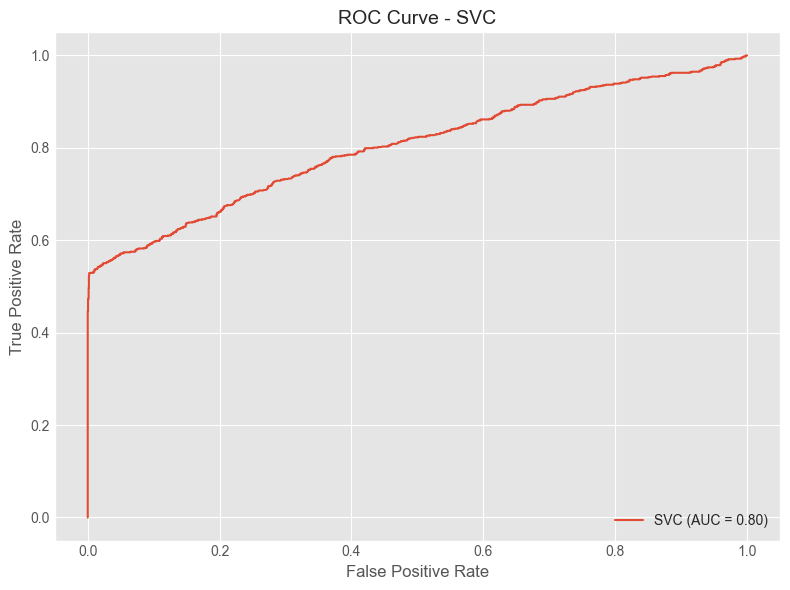

XGBClassifier Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.92      0.89      2300
         Yes       0.74      0.58      0.65       852

    accuracy                           0.83      3152
   macro avg       0.80      0.75      0.77      3152
weighted avg       0.82      0.83      0.82      3152

Accuracy: 0.83
F1 Score: 0.65
ROC AUC: 0.81
PR AUC: 0.76
Matthews Corrcoef: 0.55


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\training.py:183: UserWarning: [13:29:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


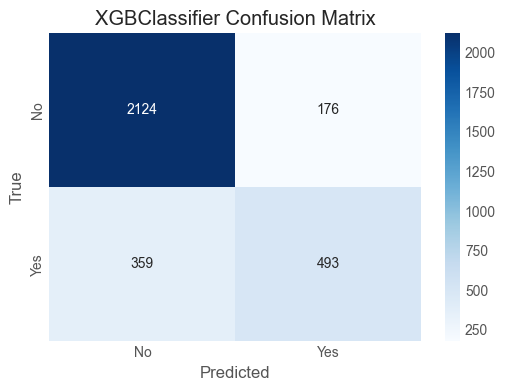

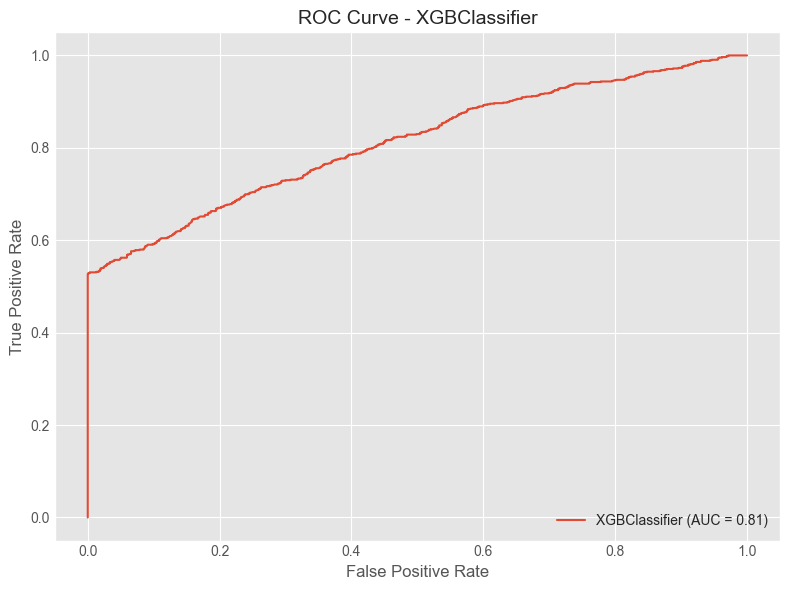

AdaBoostClassifier Classification Report:
              precision    recall  f1-score   support

          No       0.85      1.00      0.92      2300
         Yes       1.00      0.52      0.68       852

    accuracy                           0.87      3152
   macro avg       0.92      0.76      0.80      3152
weighted avg       0.89      0.87      0.86      3152

Accuracy: 0.87
F1 Score: 0.68
ROC AUC: 0.82
PR AUC: 0.72
Matthews Corrcoef: 0.66


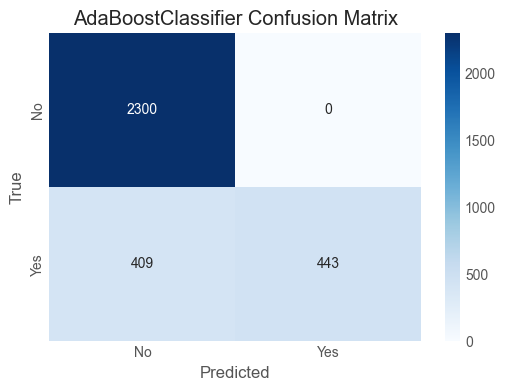

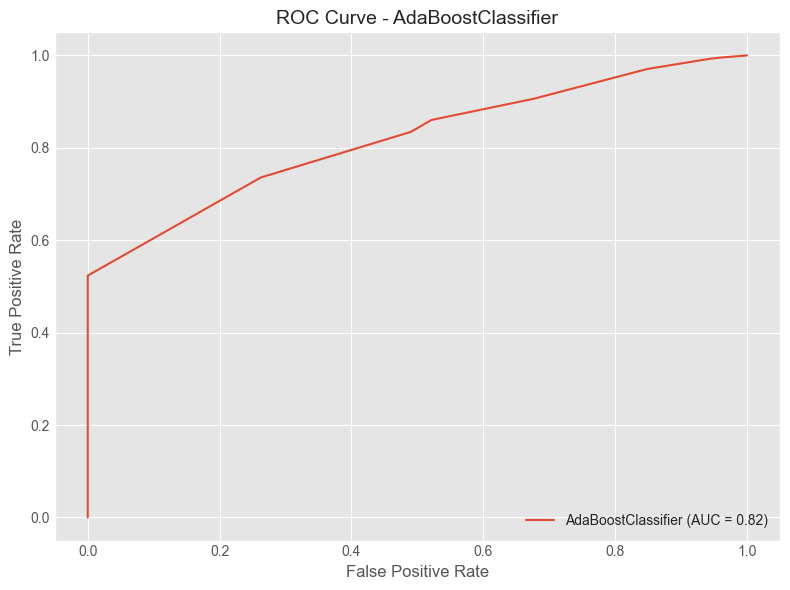

GradientBoostingClassifier Classification Report:
              precision    recall  f1-score   support

          No       0.85      0.97      0.91      2300
         Yes       0.89      0.55      0.68       852

    accuracy                           0.86      3152
   macro avg       0.87      0.76      0.79      3152
weighted avg       0.86      0.86      0.85      3152

Accuracy: 0.86
F1 Score: 0.68
ROC AUC: 0.84
PR AUC: 0.78
Matthews Corrcoef: 0.62


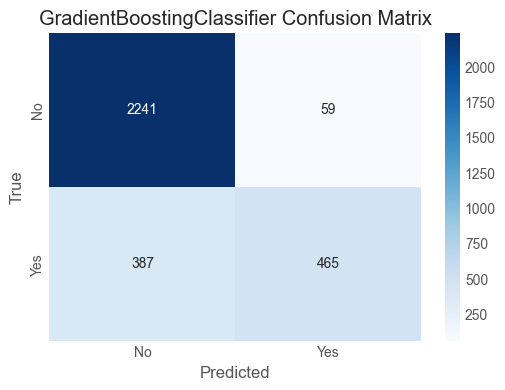

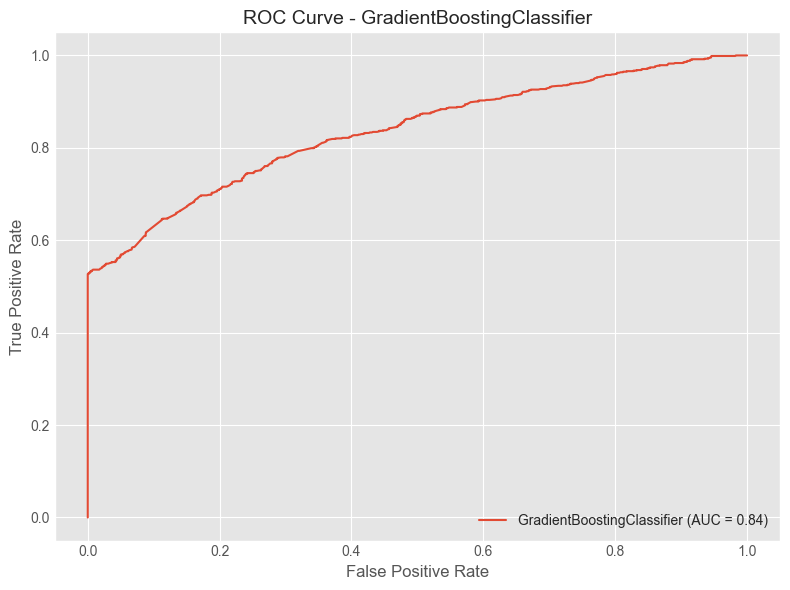

BaggingClassifier Classification Report:
              precision    recall  f1-score   support

          No       0.85      0.88      0.87      2300
         Yes       0.64      0.60      0.62       852

    accuracy                           0.80      3152
   macro avg       0.75      0.74      0.74      3152
weighted avg       0.80      0.80      0.80      3152

Accuracy: 0.80
F1 Score: 0.62
ROC AUC: 0.79
PR AUC: 0.72
Matthews Corrcoef: 0.49


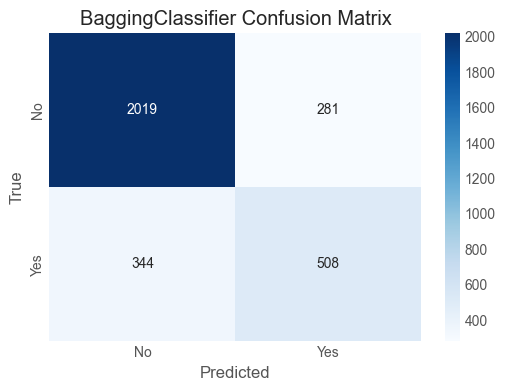

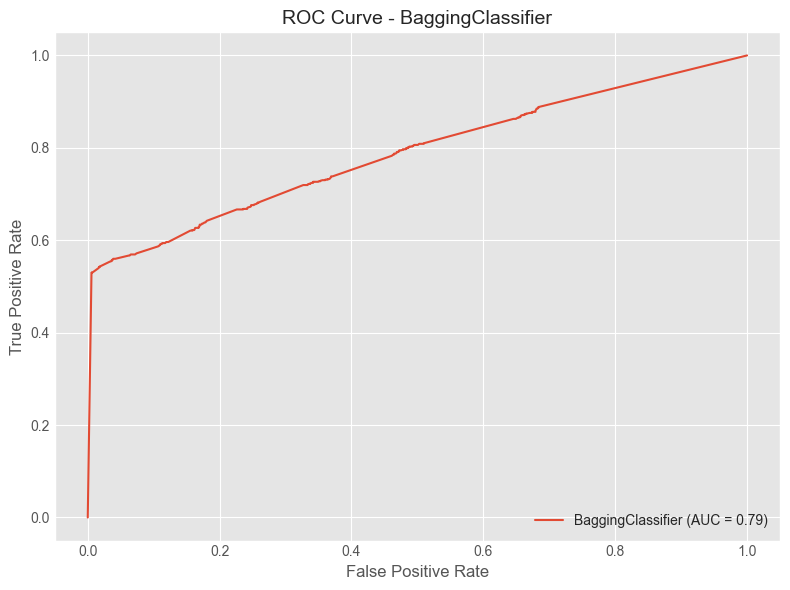

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
import lightgbm as lgb
import xgboost as xgb

from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, average_precision_score,
    classification_report, confusion_matrix, matthews_corrcoef, roc_curve
)

# Define labels
labels = ['No', 'Yes']

# Initialize classifiers
clf2 = RandomForestClassifier(random_state=42, class_weight='balanced')
clf3 = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
clf4 = KNeighborsClassifier()
clf5 = lgb.LGBMClassifier(random_state=42)
clf6 = SVC(probability=True, random_state=42)
clf7 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
clf8 = AdaBoostClassifier(random_state=42)
clf9 = GradientBoostingClassifier(random_state=42)
clf10 = BaggingClassifier(random_state=42)
#clf11 = DummyClassifier(strategy="stratified", random_state=42)

# List of models
models = [clf2, clf3, clf4, clf5, clf6, clf7, clf8, clf9, clf10]

# Plot settings
plt.style.use('ggplot')  # A consistent, safe style

# Loop through models
for clf in models:
    model_name = clf.__class__.__name__

    # Fit the model
    clf.fit(X_train_balanced, y_train_balanced)

    # Predict probabilities for AUC
    if hasattr(clf, "predict_proba"):
        y_prob = clf.predict_proba(X_test_transformed)[:, 1]
    else:
        y_prob = clf.decision_function(X_test_transformed)

    # Predict labels
    y_pred = clf.predict(X_test_transformed)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Classification Report
    cr = classification_report(y_test, y_pred, target_names=labels)
    print(f"{model_name} Classification Report:")
    print(cr)

    # Evaluate metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)
    matcf = matthews_corrcoef(y_test, y_pred)

    # Print metrics
    print(f"Accuracy: {acc:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")
    print(f"PR AUC: {pr_auc:.2f}")
    print(f"Matthews Corrcoef: {matcf:.2f}")

    # Confusion Matrix Plot
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
    plt.title(f"ROC Curve - {model_name}", fontsize=14)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()




Logistic Regression with GridSearchCV

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pa

Best Parameters for Logistic Regression: {'C': 10, 'class_weight': None, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.001}
Accuracy (Threshold=0.4): 0.87
Confusion Matrix:
[[2283   17]
 [ 400  452]]


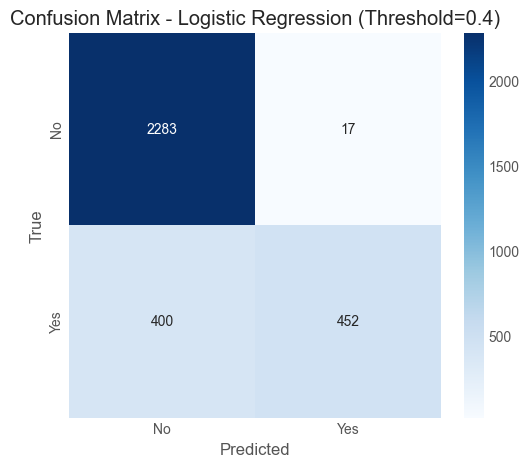


Classification Report (Threshold=0.4):
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2300
           1       0.96      0.53      0.68       852

    accuracy                           0.87      3152
   macro avg       0.91      0.76      0.80      3152
weighted avg       0.88      0.87      0.85      3152



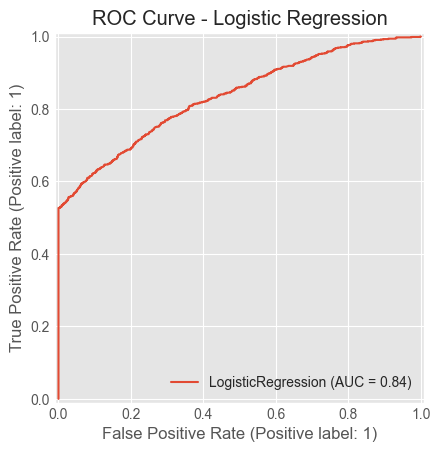

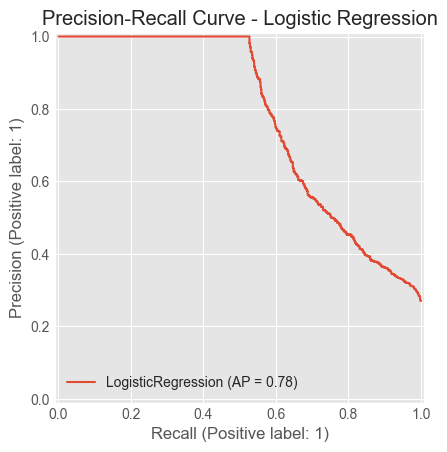

In [186]:


# Define the Logistic Regression model and parameter grid
log_reg = LogisticRegression(max_iter=1000, random_state=42)

param_grid_lr_extended = {
    'C': [0.01, 0.1, 1, 10, 50, 100],
    'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'max_iter': [1000, 2000, 3000],
    'class_weight': ['balanced', None],
    'tol': [1e-4, 1e-3, 1e-2]
}

# Perform Grid Search
grid_search_lr = GridSearchCV(log_reg, param_grid_lr_extended, cv=5, n_jobs=-1, verbose=1)
grid_search_lr.fit(X_train_transformed, y_train)

# Best parameters from Grid Search
print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)


y_proba_lr = grid_search_lr.predict_proba(X_test_transformed)[:, 1]
y_pred_lr = (y_proba_lr >= 0.4).astype(int)

# Evaluate
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy (Threshold=0.4): {accuracy_lr:.2f}")

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:")
print(cm_lr)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix - Logistic Regression (Threshold=0.4)")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
cr_lr = classification_report(y_test, y_pred_lr)
print("\nClassification Report (Threshold=0.4):")
print(cr_lr)

# ROC Curve (Threshold-independent)
roc_disp = RocCurveDisplay.from_estimator(grid_search_lr.best_estimator_, X_test_transformed, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()

# Precision-Recall Curve (Threshold-independent)
pr_disp = PrecisionRecallDisplay.from_estimator(grid_search_lr.best_estimator_, X_test_transformed, y_test)
plt.title("Precision-Recall Curve - Logistic Regression")
plt.show()




Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best Parameters for KNN: {'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Accuracy: 0.84
Confusion Matrix:
[[2183  117]
 [ 387  465]]


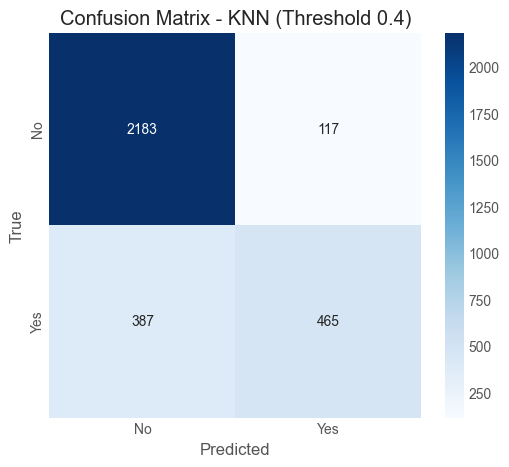


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      2300
           1       0.80      0.55      0.65       852

    accuracy                           0.84      3152
   macro avg       0.82      0.75      0.77      3152
weighted avg       0.84      0.84      0.83      3152



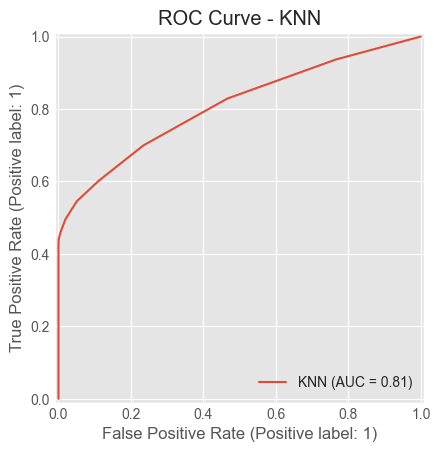

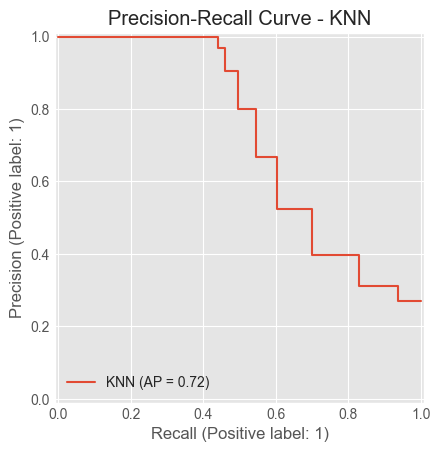

In [189]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    RocCurveDisplay, PrecisionRecallDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns

# Define the KNN model and clean parameter grid
knn = KNeighborsClassifier()

param_grid_knn = [
    {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['manhattan', 'euclidean'],
        'leaf_size': [20, 30, 40],
        'algorithm': ['auto', 'ball_tree', 'kd_tree']
    },
    {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['minkowski'],
        'p': [1, 2],
        'leaf_size': [20, 30, 40],
        'algorithm': ['auto', 'ball_tree', 'kd_tree']
    }
]

# Perform Grid Search
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, n_jobs=-1, verbose=1)
grid_search_knn.fit(X_train_transformed, y_train)

# Best parameters from Grid Search
print("Best Parameters for KNN:", grid_search_knn.best_params_)

# Predict probabilities
y_proba_knn = grid_search_knn.predict_proba(X_test_transformed)[:, 1]

# Apply custom threshold
threshold = 0.4
y_pred_knn = (y_proba_knn >= threshold).astype(int)

# Evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy_knn:.2f}")

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(cm_knn)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix - KNN (Threshold 0.4)")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
cr_knn = classification_report(y_test, y_pred_knn)
print("\nClassification Report:")
print(cr_knn)

# ROC Curve
roc_disp_knn = RocCurveDisplay.from_predictions(y_test, y_proba_knn, name="KNN")
plt.title("ROC Curve - KNN")
plt.show()

# Precision-Recall Curve
pr_disp_knn = PrecisionRecallDisplay.from_predictions(y_test, y_proba_knn, name="KNN")
plt.title("Precision-Recall Curve - KNN")
plt.show()





Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters for Random Forest: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.87
Confusion Matrix:
[[2299    1]
 [ 401  451]]


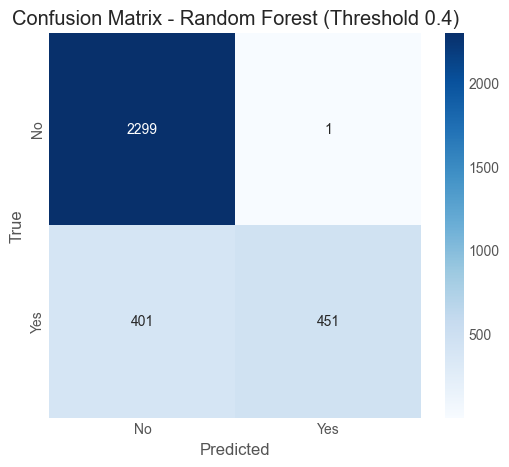


Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2300
           1       1.00      0.53      0.69       852

    accuracy                           0.87      3152
   macro avg       0.92      0.76      0.81      3152
weighted avg       0.89      0.87      0.86      3152



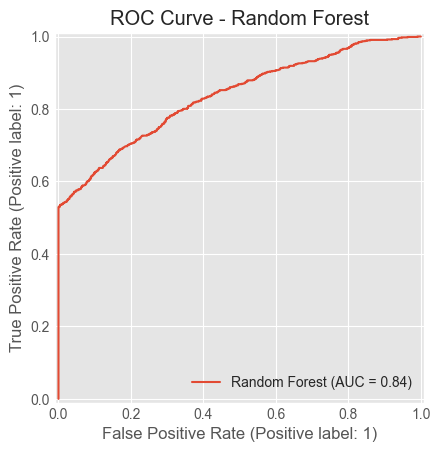

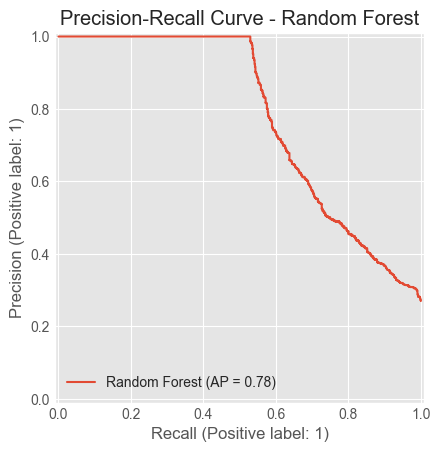

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    RocCurveDisplay, PrecisionRecallDisplay
)

# Define the Random Forest model with balanced class weights
rf2 = RandomForestClassifier(random_state=42, class_weight='balanced')

# Define parameter grid
grid_param = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100, 200]
}

# Perform Grid Search
grid_search_rf = GridSearchCV(rf, grid_param, cv=5, n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train_transformed, y_train)

# Best parameters
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

# Predict probabilities
y_proba_rf = grid_search_rf.predict_proba(X_test_transformed)[:, 1]

# Apply custom threshold
threshold = 0.4
y_pred_rf = (y_proba_rf >= threshold).astype(int)

# Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.2f}")

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(cm_rf)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix - Random Forest (Threshold 0.4)")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
cr_rf = classification_report(y_test, y_pred_rf)
print("\nClassification Report:")
print(cr_rf)

# ROC Curve
roc_disp_rf = RocCurveDisplay.from_predictions(y_test, y_proba_rf, name="Random Forest")
plt.title("ROC Curve - Random Forest")
plt.show()

# Precision-Recall Curve
pr_disp_rf = PrecisionRecallDisplay.from_predictions(y_test, y_proba_rf, name="Random Forest")
plt.title("Precision-Recall Curve - Random Forest")
plt.show()
# Get best parameters from GridSearch
best_params = grid_search_rf.best_params_

In [ ]:
 # I decided to choose RF model as it give a good recall.

In [195]:
rf = RandomForestClassifier(**grid_search_rf.best_params_)
rf.fit(X_train_transformed, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200)

In [238]:
grid_search_rf.best_score_

0.8688030427875224

In [239]:
rf3 = RandomForestClassifier(**grid_search_rf.best_params_)
rf3.fit(X_train_balanced, y_train_balanced)
print(classification_report(y_train, rf.predict(X_train_transformed), target_names=['Not-Chronic', 'Chronic'], zero_division=0))

              precision    recall  f1-score   support

 Not-Chronic       0.85      0.99      0.91      6723
     Chronic       0.97      0.56      0.71      2736

    accuracy                           0.87      9459
   macro avg       0.91      0.78      0.81      9459
weighted avg       0.88      0.87      0.86      9459



In [240]:
y_pred  = (rf3.predict_proba(X_train_transformed)[:,1]>=0.4).astype(int)

print(classification_report(y_train, y_pred, target_names=['Not-Chronic', 'Chronic']))

              precision    recall  f1-score   support

 Not-Chronic       0.90      0.74      0.81      6723
     Chronic       0.55      0.80      0.66      2736

    accuracy                           0.76      9459
   macro avg       0.73      0.77      0.73      9459
weighted avg       0.80      0.76      0.77      9459



<Axes: >

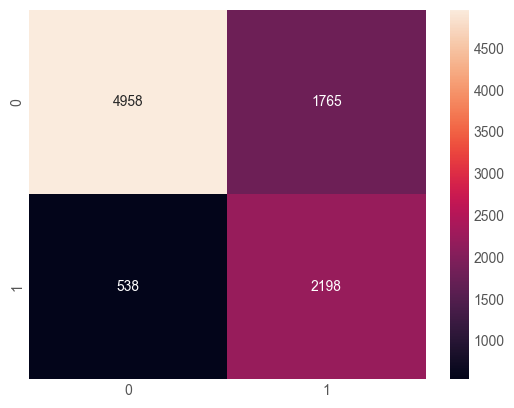

In [241]:
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='.0f')

<Axes: >

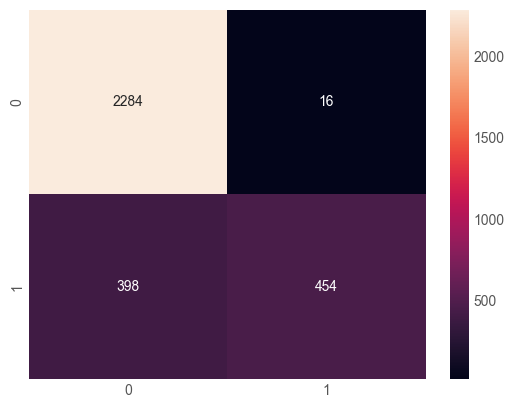

In [242]:
y_pred = rf3.predict(X_test_transformed)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')